In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.unicode_minus"] = False

In [4]:
df = pd.read_excel("./data/unemployment_age.xlsx", index_col = [0, 1])

In [8]:
df.reset_index(inplace = True)

In [9]:
df.head()

,시도별,연령계층별,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,서울특별시,15-29세,8.1,8.4,8.2,8.8,8.9,8.9,8.8,7.4,...,8.7,10.4,9.3,10.3,10.1,10.1,8.8,9.1,9.0,6.8
1,서울특별시,30-59세,3.9,3.6,3.0,3.2,3.4,3.6,3.4,3.2,...,3.0,3.2,3.1,2.9,3.3,3.5,3.2,3.3,3.6,2.4
2,서울특별시,60세이상,2.9,1.9,2.3,1.9,2.1,2.1,2.6,1.7,...,2.5,2.8,3.2,2.8,3.6,4.0,4.3,4.7,5.1,3.6
3,부산광역시,15-29세,12.1,10.7,7.6,9.0,9.9,8.8,8.2,8.3,...,8.8,9.0,9.7,9.9,11.5,9.5,9.1,10.6,7.7,6.8
4,부산광역시,30-59세,5.5,4.2,2.9,2.9,3.1,3.3,3.2,3.0,...,3.0,3.0,3.1,2.8,3.2,3.2,2.4,2.9,2.4,2.2


In [75]:
df2 = pd.melt(df, id_vars = ['시도별', '연령계층별'], ignore_index = True, value_name = '실업률', var_name = '연도')
df2['연도'] = df2['연도'].astype('int64')

In [76]:
df2.head()

,시도별,연령계층별,연도,실업률
0,서울특별시,15-29세,2000,8.1
1,서울특별시,30-59세,2000,3.9
2,서울특별시,60세이상,2000,2.9
3,부산광역시,15-29세,2000,12.1
4,부산광역시,30-59세,2000,5.5


In [43]:
by_year = df2.groupby("연도").mean(numeric_only = True)
by_year.reset_index(inplace = True)
by_year['연도'] = by_year['연도'].astype('int64')
by_year.head()

,연도,실업률
0,2000,4.103922
1,2001,3.762745
2,2002,3.154902
3,2003,3.437255
4,2004,3.582353


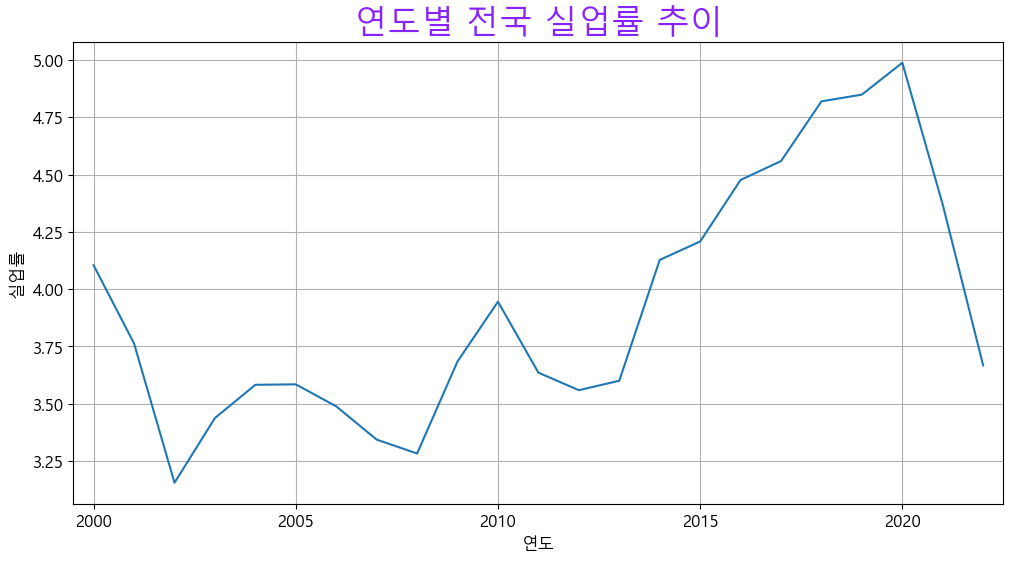

In [61]:
by_year.plot(x = '연도', y = '실업률', figsize = (12, 6), legend = False)
plt.title("연도별 전국 실업률 추이", fontdict = {'color' : '#8822ff', 'fontsize' : 24})
plt.ylabel("실업률")
plt.xlim(by_year['연도'].min()-0.5, by_year['연도'].max()+0.5)
plt.grid()
plt.show()

In [85]:
df2 = df2.groupby(["연도", "연령계층별"]).mean(numeric_only = True)

In [88]:
df2.reset_index(inplace = True)

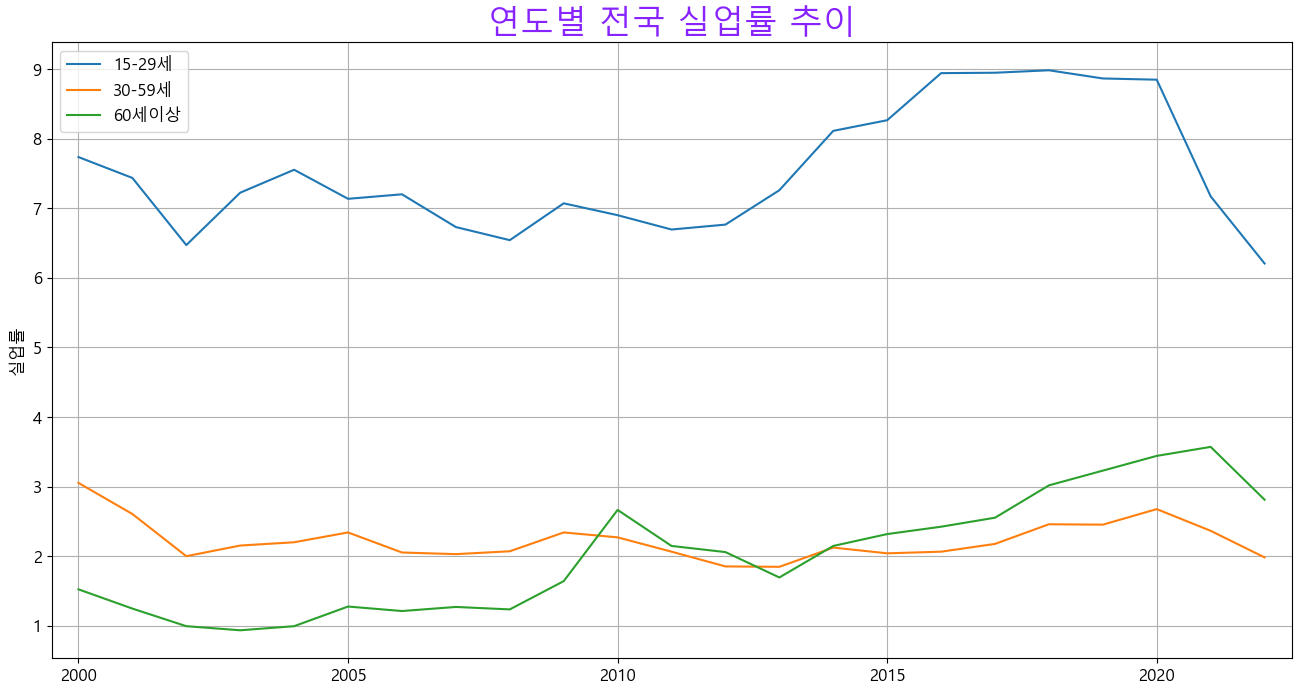

In [89]:
plt.figure(figsize = (16, 8))
for i in df2['연령계층별'].unique():
    tmp = df2[df2['연령계층별'] == i]
    plt.plot(tmp['연도'], tmp['실업률'], label = i)
plt.title("연도별 전국 실업률 추이", fontdict = {'color' : '#8822ff', 'fontsize' : 24})
plt.ylabel("실업률")
plt.xlim(by_year['연도'].min()-0.5, by_year['연도'].max()+0.5)
plt.grid()
plt.legend()
plt.show()